In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

/Users/arushiagrawal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
url = "/Users/arushiagrawal/Downloads/Diabetes.csv"
df=pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#no missing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
#duplicate data should be removed to avoid overfitting
print(f"Number of duplicates in the training data are {df.duplicated().sum()} of {len(df)}, ie {(100* df.duplicated().sum()/len(df)).round(2)} % of data duplicated")
df.drop_duplicates(inplace=True)

Number of duplicates in the training data are 0 of 768, ie 0.0 % of data duplicated


(268, 9)
(500, 9)


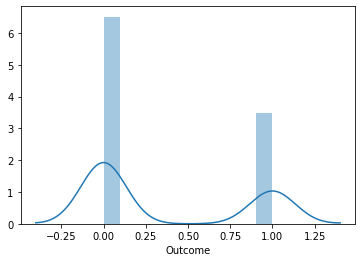

In [6]:
#the dataset is not unbalanced
positive=df[df['Outcome']==1]
negative=df[df['Outcome']==0]
print(positive.shape)
print(negative.shape)
#plotting the Outcome
sns.distplot(df['Outcome'], bins=10);

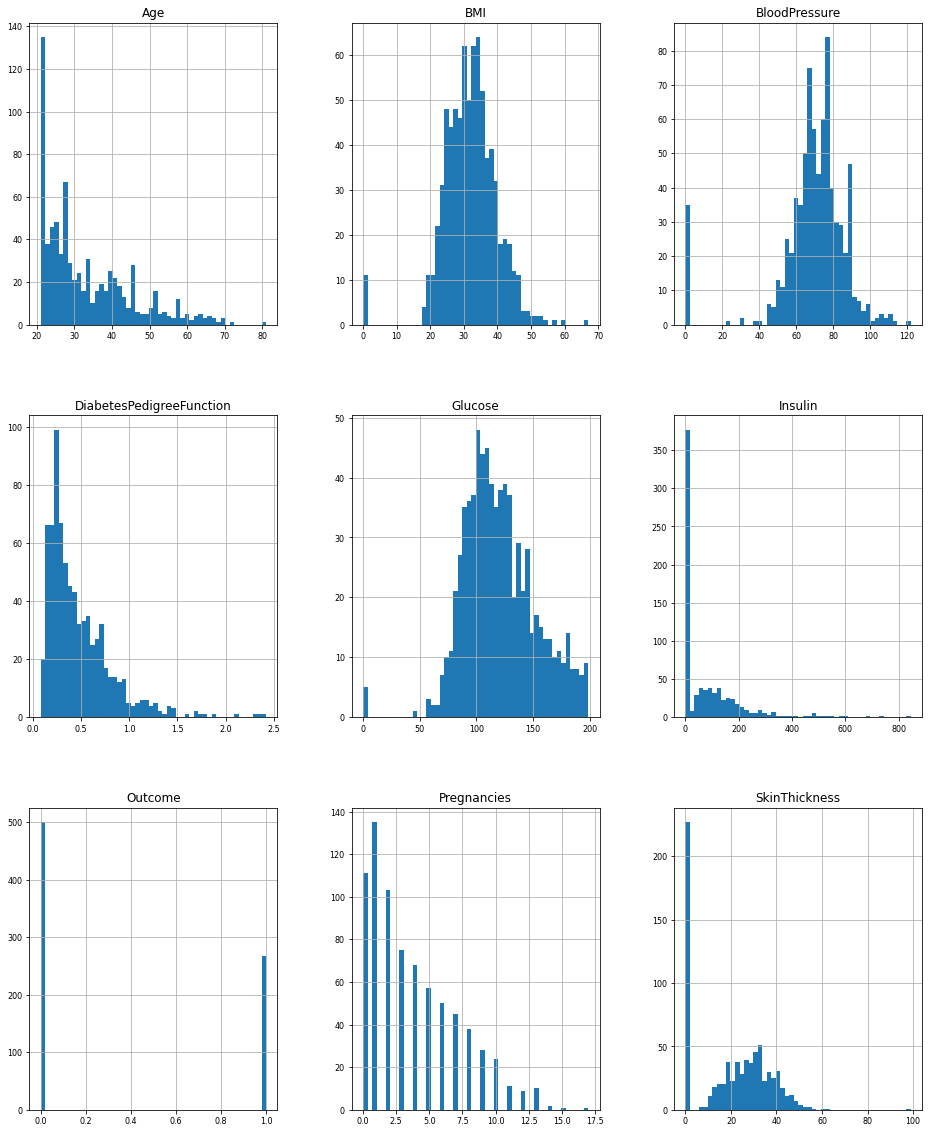

In [7]:
#bloodpressure, bmi, glucose, insulin, skinthickness
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [9]:
df_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


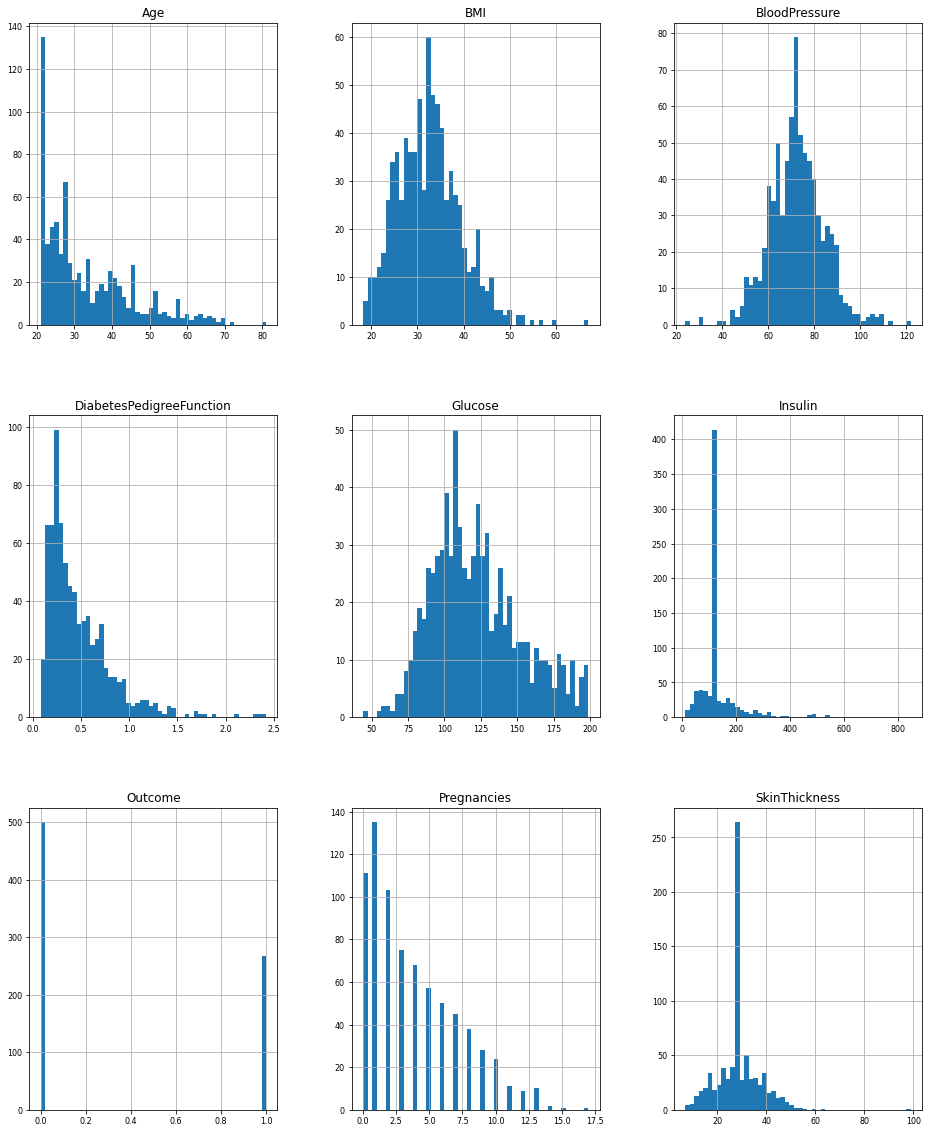

In [10]:
#the data looks better defined now
df_copy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [11]:
df_num_corr = df_copy.corr()['Outcome'][:-1]
df_num_corr

Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.166074
SkinThickness               0.214873
Insulin                     0.203790
BMI                         0.312038
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

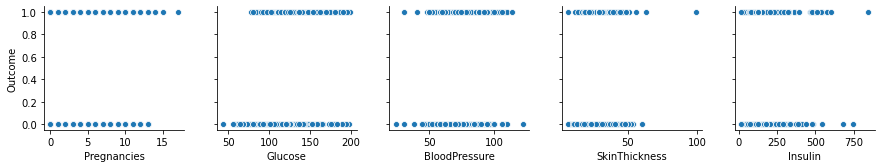

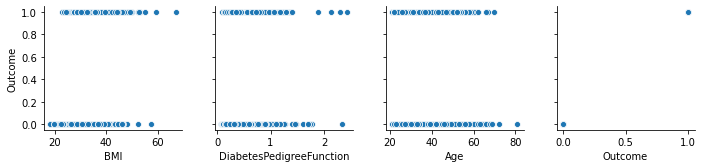

In [12]:
for i in range(0, len(df_copy.columns), 5):
    sns.pairplot(data=df_copy,
                x_vars=df_copy.columns[i:i+5],
                y_vars=['Outcome'])

In [13]:
X=df_copy.iloc[:,:-1]
y=df_copy['Outcome']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

           Name     Score
0           KNN  0.734411
1           SVM  0.752670
2           GNB  0.750047
3            LR  0.772167
4  decisiontree  0.698082
5  randomforest  0.748739
6            GB  0.769536


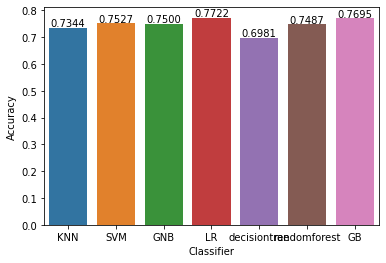

In [14]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.Outcome, random_state=0)

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GNB', GaussianNB()))
models.append(('LR', LogisticRegression(solver='liblinear',random_state=0)))
models.append(('decisiontree', tree.DecisionTreeClassifier()))
models.append(('randomforest', RandomForestClassifier(max_depth=2, random_state=10, n_estimators=10)))
models.append(('GB', GradientBoostingClassifier()))

scores = []
names = []
        
for name, model in models:
    
    score = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()



In [15]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [16]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model = KerasClassifier(build_fn = create_model, verbose = 1)

In [18]:
model.fit(X,y)

Epoch 1/1
768/768 [==============================] - 2s 3ms/step - loss: 0.6812 - accuracy: 0.6263


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10,15, 20]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] batch_size=10, epochs=10 ........................................


/Users/arushiagrawal/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/10
512/512 [==============================] - 1s 3ms/step - loss: 0.5824 - accuracy: 0.6641
Epoch 2/10
512/512 [==============================] - 0s 447us/step - loss: 0.4584 - accuracy: 0.7812
Epoch 3/10
512/512 [==============================] - 0s 380us/step - loss: 0.4448 - accuracy: 0.7910
Epoch 4/10
512/512 [==============================] - 0s 346us/step - loss: 0.4356 - accuracy: 0.7871
Epoch 5/10
512/512 [==============================] - 0s 341us/step - loss: 0.4409 - accuracy: 0.7891
Epoch 6/10
512/512 [==============================] - 0s 344us/step - loss: 0.4297 - accuracy: 0.7930
Epoch 7/10
512/512 [==============================] - 0s 369us/step - loss: 0.4265 - accuracy: 0.7988
Epoch 8/10
512/512 [==============================] - 0s 357us/step - loss: 0.4224 - accuracy: 0.7969
Epoch 9/10
512/512 [==============================] - 0s 334us/step - loss: 0.4169 - accuracy: 0.8008
Epoch 10/10
256/256 [==============================] - 0s 911us/step
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


Epoch 1/10
512/512 [==============================] - 2s 4ms/step - loss: 0.5455 - accuracy: 0.7090
Epoch 2/10
512/512 [==============================] - 0s 319us/step - loss: 0.4618 - accuracy: 0.7715
Epoch 3/10
512/512 [==============================] - 0s 396us/step - loss: 0.4475 - accuracy: 0.7852
Epoch 4/10
512/512 [==============================] - 0s 492us/step - loss: 0.4409 - accuracy: 0.7871
Epoch 5/10
512/512 [==============================] - 0s 523us/step - loss: 0.4380 - accuracy: 0.7715
Epoch 6/10
512/512 [==============================] - 0s 396us/step - loss: 0.4343 - accuracy: 0.7930
Epoch 7/10
512/512 [==============================] - 0s 353us/step - loss: 0.4309 - accuracy: 0.7871
Epoch 8/10
512/512 [==============================] - 0s 591us/step - loss: 0.4220 - accuracy: 0.7852
Epoch 9/10
512/512 [==============================] - 0s 432us/step - loss: 0.4302 - accuracy: 0.7871
Epoch 10/10
256/256 [==============================] - 0s 920us/step
[CV] ..........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


Epoch 1/10
512/512 [==============================] - 2s 4ms/step - loss: 0.5893 - accuracy: 0.6641
Epoch 2/10
512/512 [==============================] - 0s 335us/step - loss: 0.5012 - accuracy: 0.7656
Epoch 3/10
512/512 [==============================] - 0s 556us/step - loss: 0.4928 - accuracy: 0.7656
Epoch 4/10
512/512 [==============================] - 0s 417us/step - loss: 0.4842 - accuracy: 0.7520
Epoch 5/10
512/512 [==============================] - 0s 552us/step - loss: 0.4796 - accuracy: 0.7578
Epoch 6/10
512/512 [==============================] - 0s 526us/step - loss: 0.4846 - accuracy: 0.7461
Epoch 7/10
512/512 [==============================] - 0s 618us/step - loss: 0.4739 - accuracy: 0.7539
Epoch 8/10
512/512 [==============================] - 0s 367us/step - loss: 0.4673 - accuracy: 0.7559
Epoch 9/10
512/512 [==============================] - 0s 332us/step - loss: 0.4658 - accuracy: 0.7793
Epoch 10/10
256/256 [==============================] - 0s 2ms/step
[CV] ............

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s remaining:    0.0s


Epoch 1/50
512/512 [==============================] - 2s 4ms/step - loss: 0.5552 - accuracy: 0.7148
Epoch 2/50
512/512 [==============================] - 0s 556us/step - loss: 0.4580 - accuracy: 0.7930
Epoch 3/50
512/512 [==============================] - 0s 537us/step - loss: 0.4574 - accuracy: 0.7852
Epoch 4/50
512/512 [==============================] - 0s 910us/step - loss: 0.4340 - accuracy: 0.7793
Epoch 5/50
512/512 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.7891
Epoch 6/50
512/512 [==============================] - 0s 911us/step - loss: 0.4236 - accuracy: 0.8027
Epoch 7/50
512/512 [==============================] - 0s 629us/step - loss: 0.4218 - accuracy: 0.7969
Epoch 8/50
512/512 [==============================] - 0s 755us/step - loss: 0.4116 - accuracy: 0.8047
Epoch 9/50
512/512 [==============================] - 0s 731us/step - loss: 0.4133 - accuracy: 0.8086
Epoch 10/50
512/512 [==============================] - 0s 800us/step - loss: 0.4025 - 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.6s remaining:    0.0s


Epoch 1/50
512/512 [==============================] - 2s 3ms/step - loss: 0.6499 - accuracy: 0.7305
Epoch 2/50
512/512 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7695
Epoch 3/50
512/512 [==============================] - 0s 613us/step - loss: 0.5329 - accuracy: 0.7812
Epoch 4/50
512/512 [==============================] - 0s 680us/step - loss: 0.5183 - accuracy: 0.7734
Epoch 5/50
512/512 [==============================] - 0s 725us/step - loss: 0.5014 - accuracy: 0.7812
Epoch 6/50
512/512 [==============================] - 0s 491us/step - loss: 0.5004 - accuracy: 0.7734
Epoch 7/50
512/512 [==============================] - 0s 678us/step - loss: 0.4890 - accuracy: 0.7656
Epoch 8/50
512/512 [==============================] - 0s 352us/step - loss: 0.4789 - accuracy: 0.7715
Epoch 9/50
512/512 [==============================] - 0s 443us/step - loss: 0.4750 - accuracy: 0.7715
Epoch 10/50
512/512 [==============================] - 0s 404us/step - loss: 0.4711 - 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.1s remaining:    0.0s


Epoch 1/50
512/512 [==============================] - 1s 3ms/step - loss: 0.6181 - accuracy: 0.6758
Epoch 2/50
512/512 [==============================] - 0s 304us/step - loss: 0.5033 - accuracy: 0.7598
Epoch 3/50
512/512 [==============================] - 0s 364us/step - loss: 0.4932 - accuracy: 0.7656
Epoch 4/50
512/512 [==============================] - 0s 327us/step - loss: 0.4886 - accuracy: 0.7578
Epoch 5/50
512/512 [==============================] - 0s 329us/step - loss: 0.4861 - accuracy: 0.7559
Epoch 6/50
512/512 [==============================] - 0s 312us/step - loss: 0.4831 - accuracy: 0.7539
Epoch 7/50
512/512 [==============================] - 0s 305us/step - loss: 0.4768 - accuracy: 0.7676
Epoch 8/50
512/512 [==============================] - 0s 303us/step - loss: 0.4815 - accuracy: 0.7715
Epoch 9/50
512/512 [==============================] - 0s 394us/step - loss: 0.4680 - accuracy: 0.7656
Epoch 10/50
512/512 [==============================] - 0s 323us/step - loss: 0.4717 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s


Epoch 1/100
512/512 [==============================] - 1s 3ms/step - loss: 0.5907 - accuracy: 0.6621
Epoch 2/100
512/512 [==============================] - 0s 357us/step - loss: 0.4989 - accuracy: 0.6680
Epoch 3/100
512/512 [==============================] - 0s 347us/step - loss: 0.4739 - accuracy: 0.7734
Epoch 4/100
512/512 [==============================] - 0s 384us/step - loss: 0.4615 - accuracy: 0.7754
Epoch 5/100
512/512 [==============================] - 0s 338us/step - loss: 0.4513 - accuracy: 0.7852
Epoch 6/100
512/512 [==============================] - 0s 356us/step - loss: 0.4445 - accuracy: 0.7930
Epoch 7/100
512/512 [==============================] - 0s 332us/step - loss: 0.4366 - accuracy: 0.7969
Epoch 8/100
512/512 [==============================] - 0s 346us/step - loss: 0.4354 - accuracy: 0.7930
Epoch 9/100
512/512 [==============================] - 0s 338us/step - loss: 0.4287 - accuracy: 0.8086
Epoch 10/100
512/512 [==============================] - 0s 377us/step - los

512/512 [==============================] - 0s 627us/step - loss: 0.3806 - accuracy: 0.8184
Epoch 80/100
512/512 [==============================] - 0s 774us/step - loss: 0.3816 - accuracy: 0.8242
Epoch 81/100
512/512 [==============================] - 0s 871us/step - loss: 0.3818 - accuracy: 0.8223
Epoch 82/100
512/512 [==============================] - 0s 400us/step - loss: 0.3916 - accuracy: 0.8105
Epoch 83/100
512/512 [==============================] - 0s 373us/step - loss: 0.3838 - accuracy: 0.8301
Epoch 84/100
512/512 [==============================] - 0s 362us/step - loss: 0.3791 - accuracy: 0.8301
Epoch 85/100
512/512 [==============================] - 0s 337us/step - loss: 0.3866 - accuracy: 0.8164
Epoch 86/100
512/512 [==============================] - 0s 349us/step - loss: 0.3832 - accuracy: 0.8281
Epoch 87/100
512/512 [==============================] - 0s 366us/step - loss: 0.3838 - accuracy: 0.8262
Epoch 88/100
512/512 [==============================] - 0s 379us/step - loss:

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.5min remaining:    0.0s


Epoch 1/100
512/512 [==============================] - 1s 3ms/step - loss: 0.5662 - accuracy: 0.6523
Epoch 2/100
512/512 [==============================] - 0s 297us/step - loss: 0.4675 - accuracy: 0.7559
Epoch 3/100
512/512 [==============================] - 0s 336us/step - loss: 0.4524 - accuracy: 0.7695
Epoch 4/100
512/512 [==============================] - 0s 546us/step - loss: 0.4452 - accuracy: 0.7852
Epoch 5/100
512/512 [==============================] - 0s 341us/step - loss: 0.4402 - accuracy: 0.7695
Epoch 6/100
512/512 [==============================] - 0s 306us/step - loss: 0.4407 - accuracy: 0.7734
Epoch 7/100
512/512 [==============================] - 0s 306us/step - loss: 0.4317 - accuracy: 0.7852
Epoch 8/100
512/512 [==============================] - 0s 321us/step - loss: 0.4307 - accuracy: 0.7773
Epoch 9/100
512/512 [==============================] - 0s 316us/step - loss: 0.4223 - accuracy: 0.7871
Epoch 10/100
512/512 [==============================] - 0s 335us/step - los

512/512 [==============================] - 0s 464us/step - loss: 0.3534 - accuracy: 0.8457
Epoch 80/100
512/512 [==============================] - 0s 617us/step - loss: 0.3666 - accuracy: 0.8340
Epoch 81/100
512/512 [==============================] - 0s 367us/step - loss: 0.3529 - accuracy: 0.8535
Epoch 82/100
512/512 [==============================] - 0s 684us/step - loss: 0.3565 - accuracy: 0.8418
Epoch 83/100
512/512 [==============================] - 0s 671us/step - loss: 0.3498 - accuracy: 0.8555
Epoch 84/100
512/512 [==============================] - 0s 384us/step - loss: 0.3436 - accuracy: 0.8555
Epoch 85/100
512/512 [==============================] - 0s 898us/step - loss: 0.3511 - accuracy: 0.8418
Epoch 86/100
512/512 [==============================] - 0s 438us/step - loss: 0.3502 - accuracy: 0.8613
Epoch 87/100
512/512 [==============================] - 0s 329us/step - loss: 0.3446 - accuracy: 0.8516
Epoch 88/100
512/512 [==============================] - 0s 330us/step - loss:

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


Epoch 1/100
512/512 [==============================] - 2s 4ms/step - loss: 0.5935 - accuracy: 0.6387
Epoch 2/100
512/512 [==============================] - 0s 591us/step - loss: 0.5227 - accuracy: 0.7129
Epoch 3/100
512/512 [==============================] - 0s 526us/step - loss: 0.5051 - accuracy: 0.7695
Epoch 4/100
512/512 [==============================] - 0s 698us/step - loss: 0.4976 - accuracy: 0.7715
Epoch 5/100
512/512 [==============================] - 0s 639us/step - loss: 0.4898 - accuracy: 0.7773
Epoch 6/100
512/512 [==============================] - 0s 826us/step - loss: 0.4836 - accuracy: 0.7715
Epoch 7/100
512/512 [==============================] - 0s 732us/step - loss: 0.4743 - accuracy: 0.7773
Epoch 8/100
512/512 [==============================] - 0s 689us/step - loss: 0.4657 - accuracy: 0.7891
Epoch 9/100
512/512 [==============================] - 0s 543us/step - loss: 0.4759 - accuracy: 0.7637
Epoch 10/100
512/512 [==============================] - 0s 487us/step - los

512/512 [==============================] - 0s 340us/step - loss: 0.3813 - accuracy: 0.8359
Epoch 80/100
512/512 [==============================] - 0s 344us/step - loss: 0.3853 - accuracy: 0.8301
Epoch 81/100
512/512 [==============================] - 0s 422us/step - loss: 0.3774 - accuracy: 0.8379
Epoch 82/100
512/512 [==============================] - 0s 438us/step - loss: 0.3714 - accuracy: 0.8242
Epoch 83/100
512/512 [==============================] - 0s 337us/step - loss: 0.3907 - accuracy: 0.8203
Epoch 84/100
512/512 [==============================] - 0s 335us/step - loss: 0.3750 - accuracy: 0.8242
Epoch 85/100
512/512 [==============================] - 0s 360us/step - loss: 0.3750 - accuracy: 0.8281
Epoch 86/100
512/512 [==============================] - 0s 368us/step - loss: 0.3848 - accuracy: 0.8203
Epoch 87/100
512/512 [==============================] - 0s 388us/step - loss: 0.3734 - accuracy: 0.8301
Epoch 88/100
512/512 [==============================] - 0s 346us/step - loss:

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min remaining:    0.0s


Epoch 1/10
512/512 [==============================] - 2s 3ms/step - loss: 0.6569 - accuracy: 0.7461
Epoch 2/10
512/512 [==============================] - 0s 223us/step - loss: 0.5893 - accuracy: 0.7676
Epoch 3/10
512/512 [==============================] - 0s 219us/step - loss: 0.5491 - accuracy: 0.7773
Epoch 4/10
512/512 [==============================] - 0s 250us/step - loss: 0.5217 - accuracy: 0.7930
Epoch 5/10
512/512 [==============================] - 0s 229us/step - loss: 0.5064 - accuracy: 0.7852
Epoch 6/10
512/512 [==============================] - 0s 266us/step - loss: 0.4929 - accuracy: 0.7852
Epoch 7/10
512/512 [==============================] - 0s 281us/step - loss: 0.4810 - accuracy: 0.7930
Epoch 8/10
512/512 [==============================] - 0s 340us/step - loss: 0.4662 - accuracy: 0.8027
Epoch 9/10
512/512 [==============================] - 0s 386us/step - loss: 0.4580 - accuracy: 0.7930
Epoch 10/10
256/256 [==============================] - 0s 2ms/step
[CV] ............

512/512 [==============================] - 0s 307us/step - loss: 0.3395 - accuracy: 0.8477
Epoch 46/50
512/512 [==============================] - 0s 219us/step - loss: 0.3419 - accuracy: 0.8555
Epoch 47/50
512/512 [==============================] - 0s 222us/step - loss: 0.3271 - accuracy: 0.8594
Epoch 48/50
512/512 [==============================] - 0s 226us/step - loss: 0.3299 - accuracy: 0.8672
Epoch 49/50
512/512 [==============================] - 0s 228us/step - loss: 0.3291 - accuracy: 0.8574
Epoch 50/50
256/256 [==============================] - 0s 847us/step
[CV] ............ batch_size=15, epochs=50, score=0.727, total=  10.1s
[CV] batch_size=15, epochs=50 ........................................
Epoch 1/50
512/512 [==============================] - 1s 3ms/step - loss: 0.5843 - accuracy: 0.7520
Epoch 2/50
512/512 [==============================] - 0s 241us/step - loss: 0.4592 - accuracy: 0.7773
Epoch 3/50
512/512 [==============================] - 0s 234us/step - loss: 0.4504 -

512/512 [==============================] - 0s 232us/step - loss: 0.4323 - accuracy: 0.7949
Epoch 22/50
512/512 [==============================] - 0s 217us/step - loss: 0.4377 - accuracy: 0.7910
Epoch 23/50
512/512 [==============================] - 0s 283us/step - loss: 0.4306 - accuracy: 0.8047
Epoch 24/50
512/512 [==============================] - 0s 225us/step - loss: 0.4359 - accuracy: 0.7949
Epoch 25/50
512/512 [==============================] - 0s 215us/step - loss: 0.4317 - accuracy: 0.8047
Epoch 26/50
512/512 [==============================] - 0s 223us/step - loss: 0.4261 - accuracy: 0.8105
Epoch 27/50
512/512 [==============================] - 0s 222us/step - loss: 0.4376 - accuracy: 0.8047
Epoch 28/50
512/512 [==============================] - 0s 207us/step - loss: 0.4321 - accuracy: 0.8027
Epoch 29/50
512/512 [==============================] - 0s 215us/step - loss: 0.4291 - accuracy: 0.8027
Epoch 30/50
512/512 [==============================] - 0s 216us/step - loss: 0.4197 -

512/512 [==============================] - 0s 208us/step - loss: 0.3649 - accuracy: 0.8184
Epoch 49/100
512/512 [==============================] - 0s 232us/step - loss: 0.3633 - accuracy: 0.8242
Epoch 50/100
512/512 [==============================] - 0s 227us/step - loss: 0.3601 - accuracy: 0.8398
Epoch 51/100
512/512 [==============================] - 0s 205us/step - loss: 0.3641 - accuracy: 0.8223
Epoch 52/100
512/512 [==============================] - 0s 203us/step - loss: 0.3607 - accuracy: 0.8262
Epoch 53/100
512/512 [==============================] - 0s 203us/step - loss: 0.3746 - accuracy: 0.8301
Epoch 54/100
512/512 [==============================] - 0s 203us/step - loss: 0.3613 - accuracy: 0.8262
Epoch 55/100
512/512 [==============================] - 0s 204us/step - loss: 0.3652 - accuracy: 0.8320
Epoch 56/100
512/512 [==============================] - 0s 225us/step - loss: 0.3604 - accuracy: 0.8301
Epoch 57/100
512/512 [==============================] - 0s 230us/step - loss:

512/512 [==============================] - 0s 211us/step - loss: 0.3998 - accuracy: 0.7832
Epoch 26/100
512/512 [==============================] - 0s 359us/step - loss: 0.3974 - accuracy: 0.7969
Epoch 27/100
512/512 [==============================] - 0s 238us/step - loss: 0.3925 - accuracy: 0.7988
Epoch 28/100
512/512 [==============================] - 0s 220us/step - loss: 0.3929 - accuracy: 0.8008
Epoch 29/100
512/512 [==============================] - 0s 225us/step - loss: 0.3950 - accuracy: 0.8105
Epoch 30/100
512/512 [==============================] - 0s 215us/step - loss: 0.3902 - accuracy: 0.8105
Epoch 31/100
512/512 [==============================] - 0s 225us/step - loss: 0.4044 - accuracy: 0.8047
Epoch 32/100
512/512 [==============================] - 0s 220us/step - loss: 0.3899 - accuracy: 0.8145
Epoch 33/100
512/512 [==============================] - 0s 218us/step - loss: 0.3912 - accuracy: 0.7988
Epoch 34/100
512/512 [==============================] - 0s 254us/step - loss:

512/512 [==============================] - 0s 207us/step - loss: 0.5003 - accuracy: 0.7559
Epoch 3/100
512/512 [==============================] - 0s 204us/step - loss: 0.4908 - accuracy: 0.7676
Epoch 4/100
512/512 [==============================] - 0s 212us/step - loss: 0.4911 - accuracy: 0.7480
Epoch 5/100
512/512 [==============================] - 0s 220us/step - loss: 0.4748 - accuracy: 0.7656
Epoch 6/100
512/512 [==============================] - 0s 222us/step - loss: 0.4667 - accuracy: 0.7695
Epoch 7/100
512/512 [==============================] - 0s 289us/step - loss: 0.4611 - accuracy: 0.7754
Epoch 8/100
512/512 [==============================] - 0s 220us/step - loss: 0.4597 - accuracy: 0.7812
Epoch 9/100
512/512 [==============================] - 0s 272us/step - loss: 0.4632 - accuracy: 0.7773
Epoch 10/100
512/512 [==============================] - 0s 247us/step - loss: 0.4510 - accuracy: 0.7852
Epoch 11/100
512/512 [==============================] - 0s 210us/step - loss: 0.4466

Epoch 81/100
512/512 [==============================] - 0s 230us/step - loss: 0.4071 - accuracy: 0.8145
Epoch 82/100
512/512 [==============================] - 0s 252us/step - loss: 0.4060 - accuracy: 0.8047
Epoch 83/100
512/512 [==============================] - 0s 214us/step - loss: 0.3983 - accuracy: 0.8281
Epoch 84/100
512/512 [==============================] - 0s 226us/step - loss: 0.4160 - accuracy: 0.8223
Epoch 85/100
512/512 [==============================] - 0s 219us/step - loss: 0.3989 - accuracy: 0.8164
Epoch 86/100
512/512 [==============================] - 0s 209us/step - loss: 0.4025 - accuracy: 0.8184
Epoch 87/100
512/512 [==============================] - 0s 210us/step - loss: 0.3975 - accuracy: 0.8320
Epoch 88/100
512/512 [==============================] - 0s 209us/step - loss: 0.3959 - accuracy: 0.8262
Epoch 89/100
512/512 [==============================] - 0s 211us/step - loss: 0.3876 - accuracy: 0.8281
Epoch 90/100
512/512 [==============================] - 0s 220us

512/512 [==============================] - 0s 173us/step - loss: 0.3664 - accuracy: 0.8320
Epoch 24/50
512/512 [==============================] - 0s 165us/step - loss: 0.3623 - accuracy: 0.8301
Epoch 25/50
512/512 [==============================] - 0s 160us/step - loss: 0.3572 - accuracy: 0.8379
Epoch 26/50
512/512 [==============================] - 0s 190us/step - loss: 0.3570 - accuracy: 0.8398
Epoch 27/50
512/512 [==============================] - 0s 169us/step - loss: 0.3546 - accuracy: 0.8398
Epoch 28/50
512/512 [==============================] - 0s 165us/step - loss: 0.3539 - accuracy: 0.8359
Epoch 29/50
512/512 [==============================] - 0s 158us/step - loss: 0.3549 - accuracy: 0.8262
Epoch 30/50
512/512 [==============================] - 0s 162us/step - loss: 0.3529 - accuracy: 0.8418
Epoch 31/50
512/512 [==============================] - 0s 166us/step - loss: 0.3514 - accuracy: 0.8457
Epoch 32/50
512/512 [==============================] - 0s 158us/step - loss: 0.3498 -

256/256 [==============================] - 0s 912us/step
[CV] ............ batch_size=20, epochs=50, score=0.738, total=   7.5s
[CV] batch_size=20, epochs=50 ........................................
Epoch 1/50
512/512 [==============================] - 1s 3ms/step - loss: 0.5891 - accuracy: 0.6367
Epoch 2/50
512/512 [==============================] - 0s 181us/step - loss: 0.5337 - accuracy: 0.6855
Epoch 3/50
512/512 [==============================] - 0s 174us/step - loss: 0.5119 - accuracy: 0.7754
Epoch 4/50
512/512 [==============================] - 0s 177us/step - loss: 0.5020 - accuracy: 0.7676
Epoch 5/50
512/512 [==============================] - 0s 178us/step - loss: 0.4943 - accuracy: 0.7715
Epoch 6/50
512/512 [==============================] - 0s 171us/step - loss: 0.4847 - accuracy: 0.7812
Epoch 7/50
512/512 [==============================] - 0s 160us/step - loss: 0.4756 - accuracy: 0.7793
Epoch 8/50
512/512 [==============================] - 0s 272us/step - loss: 0.4714 - accu

512/512 [==============================] - 0s 172us/step - loss: 0.3676 - accuracy: 0.8379
Epoch 26/100
512/512 [==============================] - 0s 170us/step - loss: 0.3605 - accuracy: 0.8418
Epoch 27/100
512/512 [==============================] - 0s 162us/step - loss: 0.3570 - accuracy: 0.8379
Epoch 28/100
512/512 [==============================] - 0s 192us/step - loss: 0.3697 - accuracy: 0.8340
Epoch 29/100
512/512 [==============================] - 0s 182us/step - loss: 0.3578 - accuracy: 0.8418
Epoch 30/100
512/512 [==============================] - 0s 168us/step - loss: 0.3581 - accuracy: 0.8320
Epoch 31/100
512/512 [==============================] - 0s 165us/step - loss: 0.3589 - accuracy: 0.8320
Epoch 32/100
512/512 [==============================] - 0s 163us/step - loss: 0.3521 - accuracy: 0.8516
Epoch 33/100
512/512 [==============================] - 0s 168us/step - loss: 0.3485 - accuracy: 0.8535
Epoch 34/100
512/512 [==============================] - 0s 169us/step - loss:

512/512 [==============================] - 0s 152us/step - loss: 0.6218 - accuracy: 0.7715
Epoch 3/100
512/512 [==============================] - 0s 197us/step - loss: 0.5751 - accuracy: 0.7754
Epoch 4/100
512/512 [==============================] - 0s 157us/step - loss: 0.5456 - accuracy: 0.7832
Epoch 5/100
512/512 [==============================] - 0s 161us/step - loss: 0.5270 - accuracy: 0.7793
Epoch 6/100
512/512 [==============================] - 0s 161us/step - loss: 0.5108 - accuracy: 0.7852
Epoch 7/100
512/512 [==============================] - 0s 165us/step - loss: 0.4989 - accuracy: 0.7793
Epoch 8/100
512/512 [==============================] - 0s 158us/step - loss: 0.4909 - accuracy: 0.7793
Epoch 9/100
512/512 [==============================] - 0s 165us/step - loss: 0.4835 - accuracy: 0.7891
Epoch 10/100
512/512 [==============================] - 0s 167us/step - loss: 0.4749 - accuracy: 0.7891
Epoch 11/100
512/512 [==============================] - 0s 167us/step - loss: 0.4729

Epoch 81/100
512/512 [==============================] - 0s 174us/step - loss: 0.3614 - accuracy: 0.8223
Epoch 82/100
512/512 [==============================] - 0s 161us/step - loss: 0.3621 - accuracy: 0.8340
Epoch 83/100
512/512 [==============================] - 0s 168us/step - loss: 0.3743 - accuracy: 0.8145
Epoch 84/100
512/512 [==============================] - 0s 153us/step - loss: 0.3686 - accuracy: 0.8262
Epoch 85/100
512/512 [==============================] - 0s 173us/step - loss: 0.3572 - accuracy: 0.8398
Epoch 86/100
512/512 [==============================] - 0s 164us/step - loss: 0.3554 - accuracy: 0.8203
Epoch 87/100
512/512 [==============================] - 0s 194us/step - loss: 0.3599 - accuracy: 0.8223
Epoch 88/100
512/512 [==============================] - 0s 198us/step - loss: 0.3673 - accuracy: 0.8359
Epoch 89/100
512/512 [==============================] - 0s 163us/step - loss: 0.3542 - accuracy: 0.8418
Epoch 90/100
512/512 [==============================] - 0s 156us

Epoch 58/100
512/512 [==============================] - 0s 161us/step - loss: 0.3566 - accuracy: 0.8418
Epoch 59/100
512/512 [==============================] - 0s 159us/step - loss: 0.3530 - accuracy: 0.8379
Epoch 60/100
512/512 [==============================] - 0s 165us/step - loss: 0.3562 - accuracy: 0.8418
Epoch 61/100
512/512 [==============================] - 0s 175us/step - loss: 0.3539 - accuracy: 0.8320
Epoch 62/100
512/512 [==============================] - 0s 157us/step - loss: 0.3499 - accuracy: 0.8359
Epoch 63/100
512/512 [==============================] - 0s 186us/step - loss: 0.3452 - accuracy: 0.8359
Epoch 64/100
512/512 [==============================] - 0s 165us/step - loss: 0.3473 - accuracy: 0.8398
Epoch 65/100
512/512 [==============================] - 0s 170us/step - loss: 0.3472 - accuracy: 0.8340
Epoch 66/100
512/512 [==============================] - 0s 161us/step - loss: 0.3423 - accuracy: 0.8398
Epoch 67/100
512/512 [==============================] - 0s 157us

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.8min finished


Epoch 1/10
768/768 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.6510
Epoch 2/10
768/768 [==============================] - 0s 198us/step - loss: 0.5018 - accuracy: 0.7161
Epoch 3/10
768/768 [==============================] - 0s 204us/step - loss: 0.4811 - accuracy: 0.7812
Epoch 4/10
768/768 [==============================] - 0s 220us/step - loss: 0.4737 - accuracy: 0.7695
Epoch 5/10
768/768 [==============================] - 0s 224us/step - loss: 0.4604 - accuracy: 0.7682
Epoch 6/10
768/768 [==============================] - 0s 204us/step - loss: 0.4535 - accuracy: 0.7799
Epoch 7/10
768/768 [==============================] - 0s 205us/step - loss: 0.4518 - accuracy: 0.7865
Epoch 8/10
768/768 [==============================] - 0s 202us/step - loss: 0.4444 - accuracy: 0.7826
Epoch 9/10
768/768 [==============================] - 0s 203us/step - loss: 0.4432 - accuracy: 0.7812
Epoch 10/10
768/768 [==============================] - 0s 220us/step - loss: 0.4361 

In [22]:
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size = 15, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.754, total=   4.9s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.734, total=   6.1s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.0s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.789, total=   6.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.6s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.738, total=   4.4s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.727, total=   3.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.7s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.785, total=   4.4s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.1s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.723, total=   4.0s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   34.1s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.723, total=   4.5s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.6s remaining:    0.0s


[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.805, total=   4.4s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.0s remaining:    0.0s


[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.758, total=   4.8s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.730, total=   4.4s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.793, total=   4.4s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.754, total=   4.5s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.684, total=   4.8s
[CV] dropout_rate=0.1, learn_rate=0.01 ...............................
[CV] ... dropout_rate=0.1, learn_rate=0.01, score=0.777, total=   5.1s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.1, learn_rate=0.1, score=0.754, total=   4.5s
[CV] dropout_rate=0.1, learn_rate=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.2min finished


Best: 0.7604166666666666, using {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7591145833333334 (0.02262779582940464) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.75 (0.025315393353155705) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.75 (0.03866990209613932) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.7604166666666666 (0.025581878521339193) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.73828125 (0.03983608994994363) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.7330729166666666 (0.01948779888944761) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.72265625 (0.033298728782667764) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7591145833333334 (0.04101045767714485) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7252604166666666 (0.03194751079787838) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [24]:
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dropout(0.1))
    model.add(Dense(4, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size = 15, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.617, total=   8.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.660, total=   9.2s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.676, total=   8.0s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.9s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.617, total=   7.9s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.8s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.660, total=   7.3s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.1s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.676, total=   8.5s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.5s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.617, total=   6.2s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   55.7s remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.660, total=   6.5s
[CV] activation=softmax, init=zero ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s


[CV] ....... activation=softmax, init=zero, score=0.676, total=   6.6s
[CV] activation=relu, init=uniform ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] ....... activation=relu, init=uniform, score=0.617, total=   7.1s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.734, total=   6.1s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.793, total=   6.2s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.746, total=   6.5s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.703, total=   7.1s
[CV] activation=relu, init=normal ....................................
[CV] ........ activation=relu, init=normal, score=0.676, total=   6.4s
[CV] activation=relu, init=zero ......................................
[CV] .......... activation=relu, init=zero, score=0.617, total=   6.6s
[CV] activation=relu, init=zero ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.5min finished


Best: 0.7643229166666666, using {'activation': 'linear', 'init': 'normal'}
0.6510416666666666 (0.024773824987552668) with: {'activation': 'softmax', 'init': 'uniform'}
0.6510416666666666 (0.024773824987552668) with: {'activation': 'softmax', 'init': 'normal'}
0.6510416666666666 (0.024773824987552668) with: {'activation': 'softmax', 'init': 'zero'}
0.71484375 (0.07307924583542855) with: {'activation': 'relu', 'init': 'uniform'}
0.7083333333333334 (0.028940248399600087) with: {'activation': 'relu', 'init': 'normal'}
0.6510416666666666 (0.024773824987552668) with: {'activation': 'relu', 'init': 'zero'}
0.7591145833333334 (0.024773824987552668) with: {'activation': 'tanh', 'init': 'uniform'}
0.76171875 (0.027621358640099514) with: {'activation': 'tanh', 'init': 'normal'}
0.6510416666666666 (0.024773824987552668) with: {'activation': 'tanh', 'init': 'zero'}
0.7604166666666666 (0.028586586458463733) with: {'activation': 'linear', 'init': 'uniform'}
0.7643229166666666 (0.025976480915703128) w

In [25]:

seed = 6
np.random.seed(seed)
from keras.layers import Dropout
# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'normal', activation= 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size = 15, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X, y)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=0.742, total=  10.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.742, total=   7.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.797, total=   7.7s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.730, total=   7.8s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.746, total=   8.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   42.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.805, total=  13.9s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   56.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.746, total=  10.1s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.746, total=   8.9s
[CV] neuron1=4, neuron2=8 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV] ................ neuron1=4, neuron2=8, score=0.797, total=   9.4s
[CV] neuron1=8, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV] ................ neuron1=8, neuron2=2, score=0.742, total=   9.3s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.742, total=   9.2s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.801, total=   9.4s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.750, total=   9.4s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.727, total=  10.5s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.805, total=  10.1s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ................ neuron1=8, neuron2=8, score=0.746, total=  10.8s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  4.5min finished


Best: 0.765625, using {'neuron1': 16, 'neuron2': 2}
0.7604166666666666 (0.025779934730759544) with: {'neuron1': 4, 'neuron2': 2}
0.7604166666666666 (0.03194751079787838) with: {'neuron1': 4, 'neuron2': 4}
0.7630208333333334 (0.023938510821419574) with: {'neuron1': 4, 'neuron2': 8}
0.76171875 (0.027621358640099514) with: {'neuron1': 8, 'neuron2': 2}
0.7604166666666666 (0.03273386742181389) with: {'neuron1': 8, 'neuron2': 4}
0.7578125 (0.01940060472103039) with: {'neuron1': 8, 'neuron2': 8}
0.765625 (0.02209708691207961) with: {'neuron1': 16, 'neuron2': 2}
0.765625 (0.01940060472103039) with: {'neuron1': 16, 'neuron2': 4}
0.7643229166666666 (0.02655739329996242) with: {'neuron1': 16, 'neuron2': 8}


In [26]:
y_pred = grid.predict(X)
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.7708333333333334
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.72      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768

